In [4]:
!pip install lifelines

In [5]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
from lifelines import KaplanMeierFitter  # Importing Kaplan-Meier estimator from lifelines
from lifelines.statistics import logrank_test  # Importing log-rank test for survival comparison


In [6]:
from google.colab import files
uploaded=files.upload()

Saving GBM_patient_data.csv to GBM_patient_data.csv


In [7]:
pd_data=pd.read_csv('/content/GBM_patient_data.csv')
pd_data.head()

,age (years),"sex (0=Female, 1=Male)","MGMT_promotor_methylated (0=WT, 1=Methylated)","IDH_mutant (0=WT, 1=Mutant)","treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)","event (1=event occurred, 0=censored)",survival_time (days)
0,64.967142,0,0,1,0,1,194.181664
1,58.617357,0,0,0,0,1,73.346847
2,66.476885,1,0,0,1,1,360.114365
3,75.230299,1,0,1,1,1,219.539143
4,57.658466,0,1,0,0,0,516.734029


In [9]:
pd_data_0=pd_data[pd_data['treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)']==0]
pd_data_1=pd_data[pd_data['treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)']==1]
pd_data_0.head()
# pd_data_1.head()

,age (years),"sex (0=Female, 1=Male)","MGMT_promotor_methylated (0=WT, 1=Methylated)","IDH_mutant (0=WT, 1=Mutant)","treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)","event (1=event occurred, 0=censored)",survival_time (days)
0,64.967142,0,0,1,0,1,194.181664
1,58.617357,0,0,0,0,1,73.346847
4,57.658466,0,1,0,0,0,516.734029
9,65.425600,1,0,0,0,1,166.110538
14,42.750822,0,0,1,0,1,309.066622


# **Fit KaplanMeier to both data**

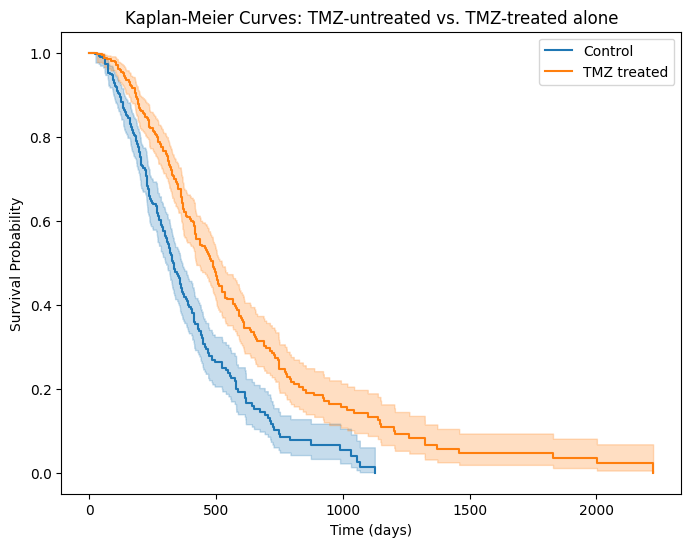

In [11]:
kmf0=KaplanMeierFitter()
kmf0.fit(durations=pd_data_0['survival_time (days)'],event_observed=pd_data_0['event (1=event occurred, 0=censored)'],label='Control')


kmf1=KaplanMeierFitter()
kmf1.fit(durations=pd_data_1['survival_time (days)'],event_observed=pd_data_1['event (1=event occurred, 0=censored)'],label='TMZ treated')

plt.figure(figsize=(8,6))

kmf0.plot_survival_function(ci_show=True)
kmf1.plot_survival_function(ci_show=True)
plt.title("Kaplan-Meier Curves: TMZ-untreated vs. TMZ-treated alone")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()





# **Log-rank test to check how statistically different the two curves are**

In [12]:
from lifelines.statistics import logrank_test
results=logrank_test(pd_data_0['survival_time (days)'],
                     pd_data_1['survival_time (days)'],
                     pd_data_0['event (1=event occurred, 0=censored)'],
                     pd_data_1['event (1=event occurred, 0=censored)'])
print(f"P_value: {results.p_value}")

P_value: 9.274697389915403e-10
